In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data_s=pd.read_csv('/content/salary classification.csv')
Data_s.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
Data_s.shape

(32561, 15)

In [ ]:
Age_income=Data_s[['age',' income']]
Age_income

,age,income
0,39,<=50K
1,50,<=50K
2,38,<=50K
3,53,<=50K
4,28,<=50K
...,...,...
32556,27,<=50K
32557,40,>50K
32558,58,<=50K
32559,22,<=50K


In [ ]:
age_income=Age_income.replace({' >50K':1,' <=50K':0})
age_income

,age,income
0,39,0
1,50,0
2,38,0
3,53,0
4,28,0
...,...,...
32556,27,0
32557,40,1
32558,58,0
32559,22,0


In [ ]:
x=age_income.iloc[:,0]. values
x=x.reshape(-1,1)
x

array([[39],
       [50],
       [38],
       ...,
       [58],
       [22],
       [52]])

In [ ]:
y=age_income.iloc[:,1]. values
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train=Sc.fit_transform(x_train)
x_test=Sc.transform(x_test)

Text(0, 0.5, 'error')

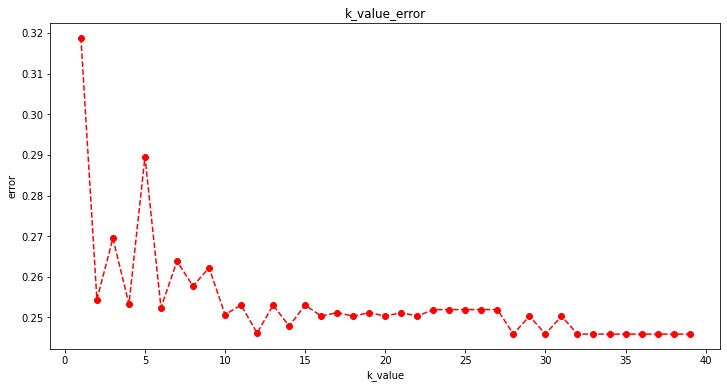

In [ ]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range (1,40):
 model=KNeighborsClassifier (n_neighbors=i)
 model.fit(x_train,y_train)
 pred=model.predict(x_test)
 error.append(np.mean(pred !=y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o')
plt.title('k_value_error')
plt.xlabel('k_value')
plt.ylabel('error')

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier (n_neighbors=12,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
age=int(input("enter new employee's age:"))
new_emp=[[age]]
Result=model.predict(Sc.transform(new_emp))
print (Result)

enter new employee's age:50
[0]


In [ ]:
if Result==1:
 print('employee might got salary above 50K')
else:
 print ('employee might get below 50K')

employee might get below 50K


In [ ]:
y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1))))

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix:')
print(cm)
print ("accuracy of the model(:{0}%".format(accuracy_score(y_test,y_pred)*100))

confusion_matrix:
[[6103   56]
 [1948   34]]
accuracy of the model(:75.38385947672276%
